In [4]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [135]:
# CSV 파일 불러오기 (인코딩을 지정하여 읽기)
csv_filename = 'webtoon_data_230829.csv'
df = pd.read_csv(csv_filename, encoding='CP949')


In [136]:
# 데이터 확인
df.head() 

,Title,Author,Age,PublicDay,Favorite,HashTag,PosterImg,starScore
0,신혼일기,자까,전체연령가,THURSDAY,332513,"일상, 2030연애, 친구>연인",https://image-comic.pstatic.net/webtoon/812354...,9.91
1,선천적 얼간이들,가스파드,전체연령가,THURSDAY,375066,"개그, 무해한, 러블리, 힐링, 4차원, 하이퍼리얼리즘, 동물, 공감성수치",https://image-comic.pstatic.net/webtoon/478261...,9.95
2,앞집나리,민송아,18세 이용가,THURSDAY,256915,"로맨스, 2030연애, 로맨스코미디, 현실로맨스, 하이틴, 하이퍼리얼리즘, 청춘로맨...",https://image-comic.pstatic.net/webtoon/802293...,9.93
3,나노마신,현절무,15세 이용가,THURSDAY,529438,"무협/사극, 레드아이스 스튜디오, 사이다, 게임판타지, 이능력배틀물, 소설원작",https://image-comic.pstatic.net/webtoon/747271...,9.91
4,촉법소년,박태준 만화회사,15세 이용가,THURSDAY,265781,"액션, 지금추천작",https://image-comic.pstatic.net/webtoon/808198...,9.88


### 웹툰 연령대 분포

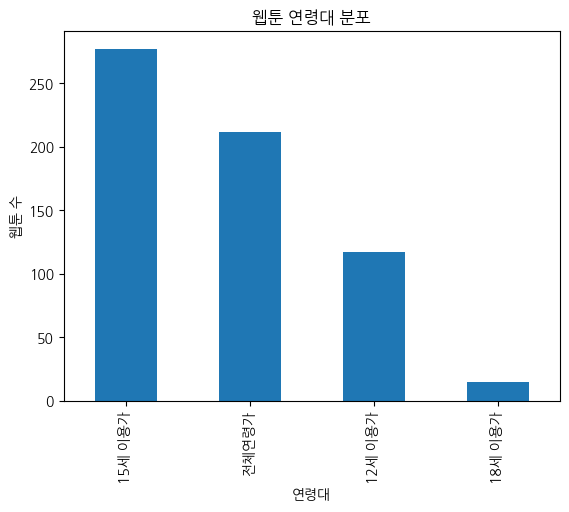

In [137]:
# 연령대별 웹툰 수 분석
age_counts = df['Age'].value_counts()
age_counts.plot(kind='bar', title='웹툰 연령대 분포')
plt.xlabel('연령대')
plt.ylabel('웹툰 수')
plt.show()

### 요일별 웹툰 수

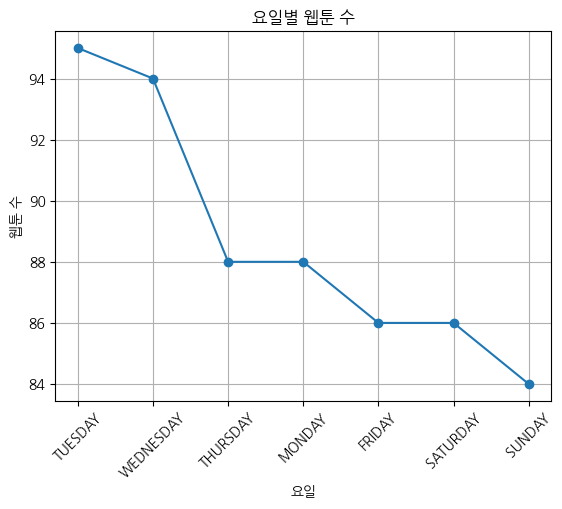

In [138]:
# 요일별 웹툰 수 분석
day_counts = df['PublicDay'].value_counts()

# 선 그래프 그리기
plt.plot(day_counts.index, day_counts.values, marker='o')

# 그래프 설정
plt.title('요일별 웹툰 수')
plt.xlabel('요일')
plt.ylabel('웹툰 수')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.grid(True)

# 그래프 출력
plt.show()

### 상위 10개 장르(HashTag)별 빈도수

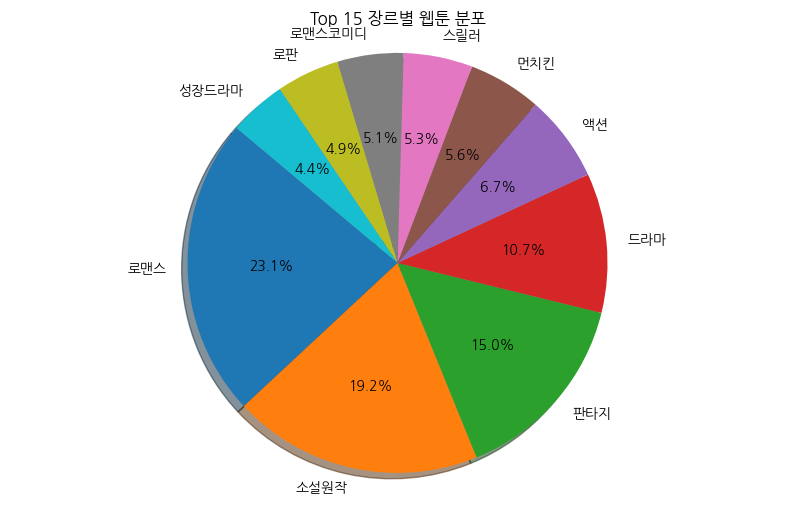

In [139]:
# 장르(HashTag)별 빈도수 계산
genre_counts = df['HashTag'].str.split(', ').explode().value_counts()

# 상위 10개의 장르만 선택
top_10_genres = genre_counts.head(10)

# 파이 차트 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 15 장르별 웹툰 분포')  # 그래프 제목

# 그래프 출력
plt.axis('equal')  # 파이 차트를 원형으로 보이게 함
plt.show()

### 상위 15개 장르별(HashTag) 평균 관심도 지수 분석

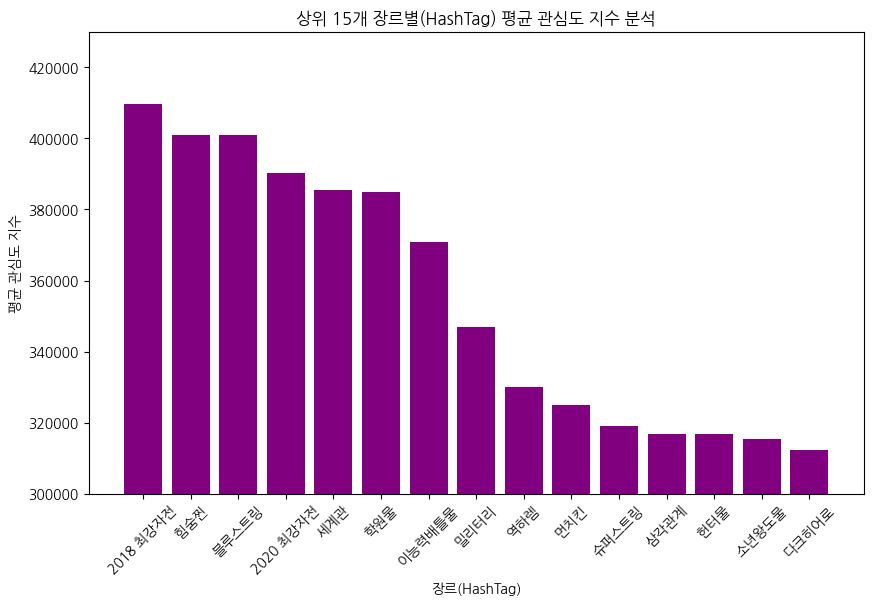

In [141]:
from collections import defaultdict

# 장르(HashTag)별 관심도 지수(Favorite)의 평균 계산
tag_favorite_dict = defaultdict(list)  # 각 장르별 관심도 지수를 저장할 딕셔너리

for index, row in df.iterrows():
    tags = row['HashTag'].split(', ')  # 장르 태그를 쉼표로 분리하여 리스트로 저장
    favorite = row['Favorite']
    
    for tag in tags:
        tag_favorite_dict[tag].append(favorite)  # 해당 장르에 관심도 지수를 추가

# 장르별 관심도 지수(Favorite)의 평균 계산
tag_average_favorite = {tag: sum(favorites) / len(favorites) for tag, favorites in tag_favorite_dict.items()}

# 결과를 데이터프레임으로 변환하여 정렬
df_genre_favorite = pd.DataFrame(tag_average_favorite.items(), columns=['장르(HashTag)', '평균 관심도 지수'])
df_genre_favorite = df_genre_favorite.sort_values(by='평균 관심도 지수', ascending=False)

# 상위 15개 장르 선택
top_15_genre_favorite = df_genre_favorite.head(15)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(top_15_genre_favorite['장르(HashTag)'], top_15_genre_favorite['평균 관심도 지수'], color='purple')
plt.title('상위 15개 장르별(HashTag) 평균 관심도 지수 분석')  # 그래프 제목
plt.xlabel('장르(HashTag)')  # x축 라벨
plt.ylabel('평균 관심도 지수')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.ylim(300000, None)  # y축 범위 설정

# 그래프 출력
plt.show()


### 별점, 관심도 지수 비교

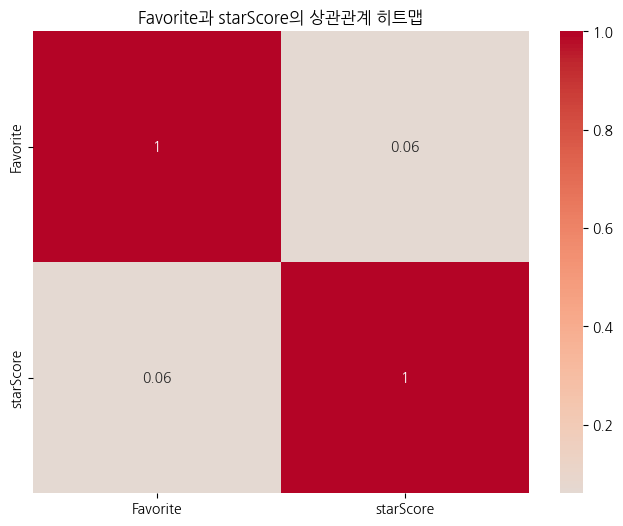

In [142]:
# Favorite과 starScore의 상관계수 계산
correlation_matrix = df[['Favorite', 'starScore']].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Favorite과 starScore의 상관관계 히트맵')
plt.show()

In [143]:
# 별점 기준 상위 10개 웹툰 선택
top_10_star = df.nlargest(10, 'starScore')
top_10_favorite = df.nlargest(10, 'Favorite')

# 상위 10개 웹툰 테이블 생성
table_star = pd.DataFrame({
    'Title': top_10_star['Title'],
    'Author': top_10_star['Author'],
    'starScore': top_10_star['starScore'],
    'Favorite': top_10_star['Favorite'],
    'HashTag': top_10_star['HashTag'],
    'Age': top_10_star['Age']
})

table_favorite = pd.DataFrame({
    'Title': top_10_favorite['Title'],
    'Author': top_10_favorite['Author'],
    'starScore': top_10_favorite['starScore'],
    'Favorite': top_10_favorite['Favorite'],
    'HashTag': top_10_favorite['HashTag'],
    'Age': top_10_favorite['Age']
})

In [144]:
# 출력
print("상위 10개 별점 웹툰")
table_star

상위 10개 별점 웹툰


,Title,Author,starScore,Favorite,HashTag,Age
443,마루는 강쥐,모죠,9.99,491888,"개그, 무해한, 햇살캐, 4차원, 동물",전체연령가
16,순정빌런,세윤,9.98,385771,"로맨스, 다정남, 로맨스코미디",12세 이용가
97,1초,시니,9.98,547361,"드라마, 직업드라마",전체연령가
103,세기말 풋사과 보습학원,순끼,9.98,500865,"로맨스, 러블리, 소꿉친구, 학원로맨스, 하이틴, 친구>연인, 성장드라마, 레트로,...",전체연령가
108,전남편의 미친개를 길들였다,철무장미,9.98,209922,"로맨스, 소설원작",15세 이용가
182,똑 닮은 딸,이담,9.98,480280,"스릴러, 2020 지상최대공모전, 서스펜스",15세 이용가
272,가비지타임,2사장,9.98,351955,"스포츠, 최강자전, 2017 최강자전, 농구, 스포츠성장",전체연령가
285,합격시켜주세용,이온,9.98,202265,판타지,전체연령가
294,허리케인 공주님,랑또,9.98,87053,"개그, 요즘핫한추천작, 학원물, 이세계, 성장드라마",전체연령가
363,미래의 골동품 가게,구아진,9.98,256541,"스릴러, 오컬트",15세 이용가


In [145]:
print("상위 10개 관심도 지수 웹툰")
table_favorite

상위 10개 관심도 지수 웹툰


,Title,Author,starScore,Favorite,HashTag,Age
89,외모지상주의,박태준,9.47,2361329,"드라마, 학원물, 먼치킨",15세 이용가
181,신의 탑,SIU,9.88,1965212,"판타지, 세계관, 이능력배틀물, 소년왕도물, 먼치킨",12세 이용가
534,프리드로우,전선욱,9.79,1631780,"드라마, 힘숨찐, 학원물, 성장드라마",15세 이용가
186,윈드브레이커,조용석,9.83,1149313,"스포츠, 스포츠성장",12세 이용가
353,화산귀환,LICO,9.93,1137212,"무협/사극, 세계관, 동양풍판타지, 회귀, 힘숨찐, 이세계, 먼치킨, 소설원작",15세 이용가
187,소녀의 세계,모랑지,9.92,1124794,"드라마, 하이틴, 학원로맨스, 직진남, 삼각관계, 까칠남, 감성드라마",전체연령가
267,싸움독학,박태준 만화회사,9.72,1077045,"액션, 학원물, 인플루언서, 소년왕도물",15세 이용가
355,전지적 독자 시점,UMI,9.94,1014822,"판타지, 세계관, 레드아이스 스튜디오, 아포칼립스, 게임판타지, 헌터물, 이능력배틀...",15세 이용가
93,재혼 황후,히어리,9.96,926352,"로맨스, 다정남, 후회물, 궁중로맨스, 혐관로맨스, 직진남, 이세계, 역하렘, 연상...",15세 이용가
179,참교육,채용택,9.87,882333,"액션, 블루스트링, 사이다, 학원물, 먼치킨, 다크히어로",15세 이용가


**별점 상위 10개 웹툰의 해시태그 분포**

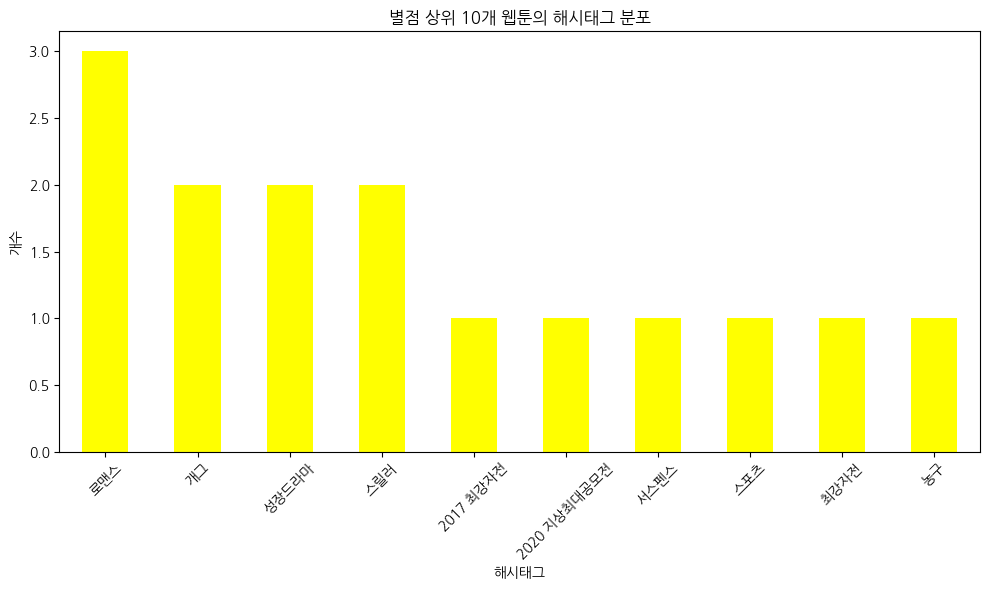

In [146]:
# 상위 10개 별점 웹툰 선택
top_10_star = df.nlargest(10, 'starScore')

# 상위 10개 웹툰의 해시태그 분석
all_tags = []
for tags in top_10_star['HashTag']:
    all_tags.extend(tags.split(', '))

tag_counts = pd.Series(all_tags).value_counts().head(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='yellow')
plt.title('별점 상위 10개 웹툰의 해시태그 분포')
plt.xlabel('해시태그')
plt.ylabel('개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**관심도 상위 10개 웹툰의 해시태그 분포**

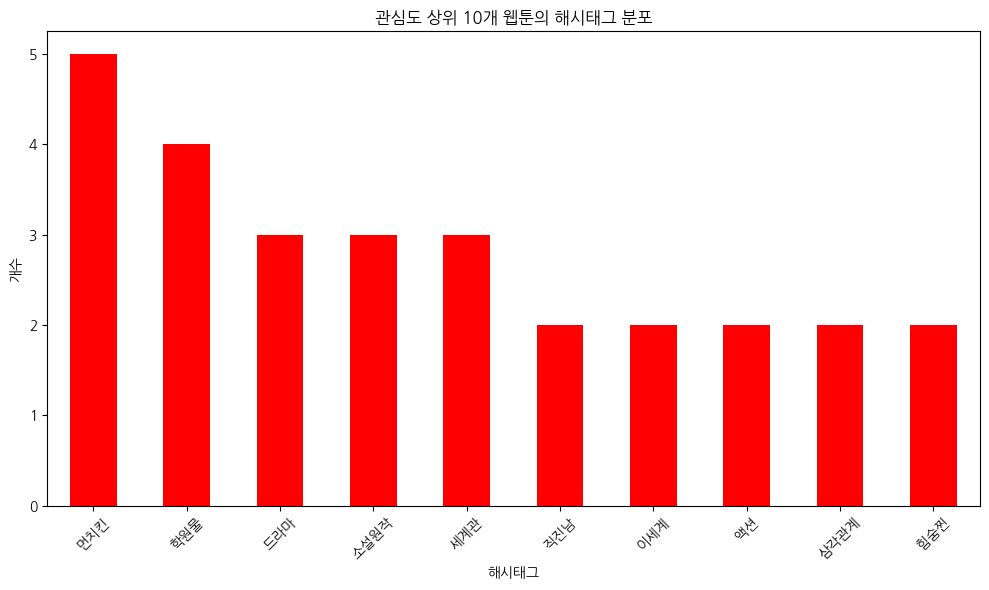

In [147]:
# 상위 10개 관심도 지수 웹툰 선택
top_10_favorite = df.nlargest(10, 'Favorite')

# 상위 10개 웹툰의 해시태그 분석
all_tags = []
for tags in top_10_favorite['HashTag']:
    all_tags.extend(tags.split(', '))

tag_counts = pd.Series(all_tags).value_counts().head(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='red')
plt.title('관심도 상위 10개 웹툰의 해시태그 분포')
plt.xlabel('해시태그')
plt.ylabel('개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **별점 상위 10개 웹툰의 해시태그 분포** : 개그, 성장드라마, 드라마, 로맨스, 스릴러, 폭스남, 집착물, 고자극로맨스, 혐관로맨스, 인외존재 -> **대중성?**
- **관심도 상위 10개 웹툰의 해시태그 분포** : 먼치킨, 학원물, 드라마, 소설원작, 세계관, 직진남, 이세계, 액션, 삼각관계, 힘순찐 -> **매니아층?**

**별점 상위 10개 웹툰 :  별점 vs 관심도 지수**

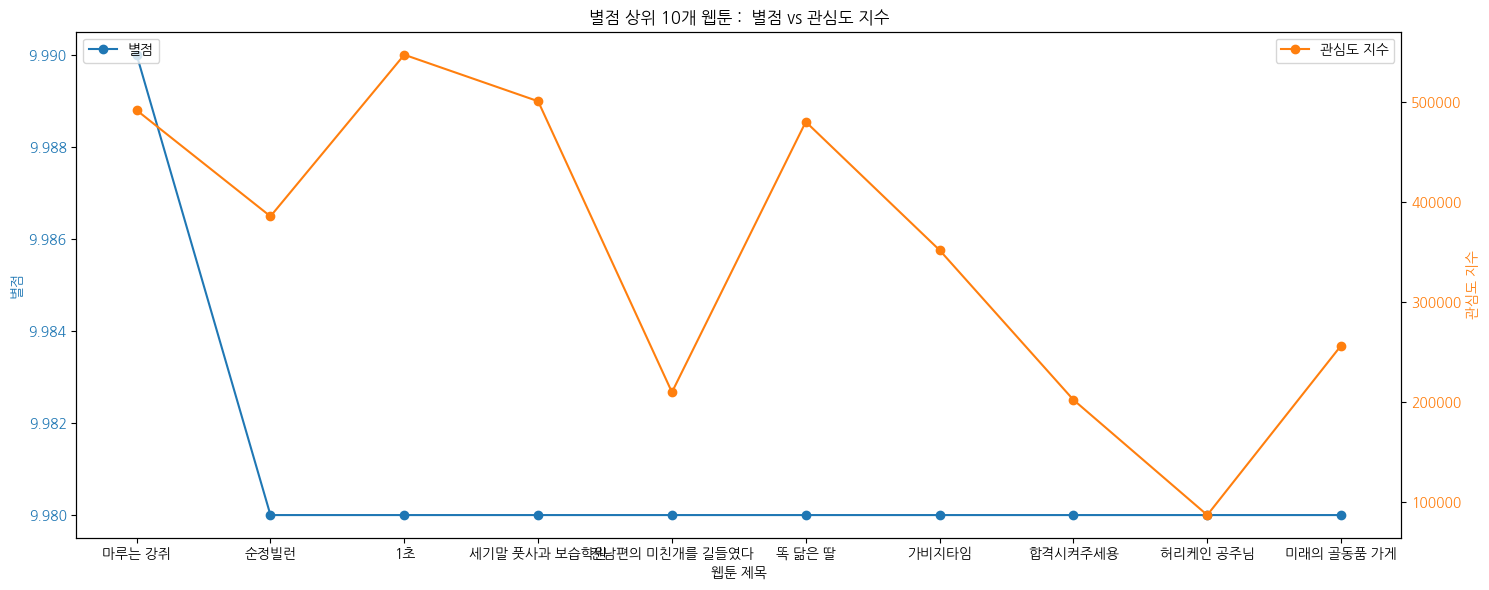

In [148]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 6))

# 첫 번째 y축 (별점)
ax1.plot(table_star['Title'], table_star['starScore'], color='tab:blue', marker='o', label='별점')
ax1.set_xlabel('웹툰 제목')
ax1.set_ylabel('별점', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# 두 번째 y축 (관심도 지수)
ax2 = ax1.twinx()
ax2.plot(table_star['Title'], table_star['Favorite'], color='tab:orange', marker='o', label='관심도 지수')
ax2.set_ylabel('관심도 지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

plt.title('별점 상위 10개 웹툰 :  별점 vs 관심도 지수')

plt.tight_layout()
plt.show()

**관심도 상위 10개 웹툰 : 별점 vs 관심도 지수**

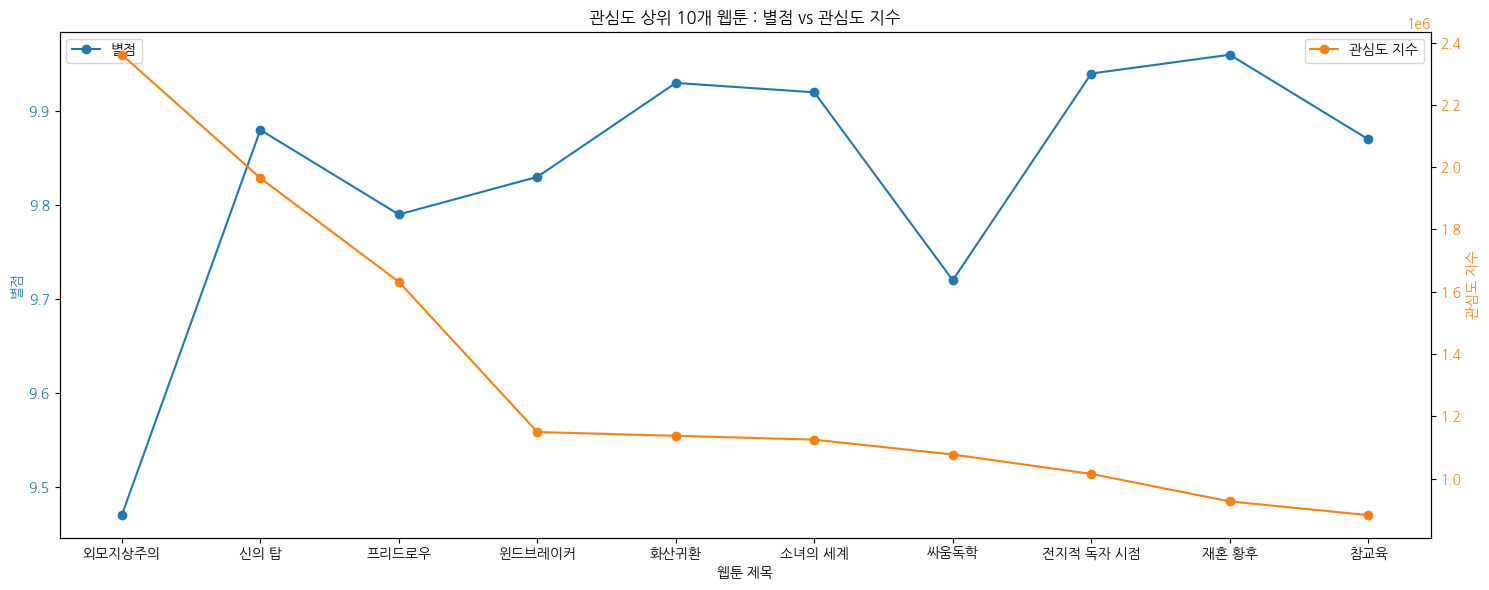

In [149]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 6))

# 첫 번째 y축 (별점)
ax1.plot(table_favorite['Title'], table_favorite['starScore'], color='tab:blue', marker='o', label='별점')
ax1.set_xlabel('웹툰 제목')
ax1.set_ylabel('별점', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# 두 번째 y축 (관심도 지수)
ax2 = ax1.twinx()
ax2.plot(table_favorite['Title'], table_favorite['Favorite'], color='tab:orange', marker='o', label='관심도 지수')
ax2.set_ylabel('관심도 지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

plt.title('관심도 상위 10개 웹툰 : 별점 vs 관심도 지수')

plt.tight_layout()
plt.show()